# SVM with sklearn exercise on toy datasets

Below you find several "toy datasets" generated with sklearn.
For each of them try to perform classification using SVM. Each time visualize decision boundary.
Experiment with type of SVM(linear, kernelized) and hyperparameters.
Try to underfit and overfit the model to datasets on purpose by changing the parameters. 
Add your comments and observations.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from matplotlib.colors import ListedColormap


cmap_bold = ListedColormap([ '#00FF00', '#0000FF','#000000', '#FFFF00'])

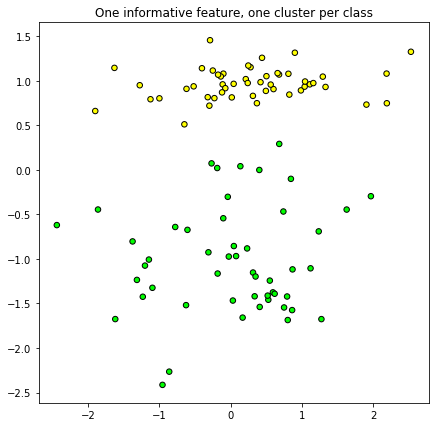

In [2]:
#Task1 
plt.figure(figsize=(7, 7))
plt.title("One informative feature, one cluster per class")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, n_classes=2, 
                             random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k', cmap=cmap_bold)

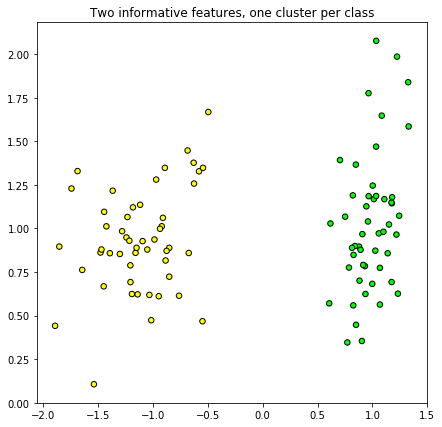

In [3]:
#Task2
plt.figure(figsize=(7, 7))
plt.title("Two informative features, one cluster per class")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k', cmap=cmap_bold)

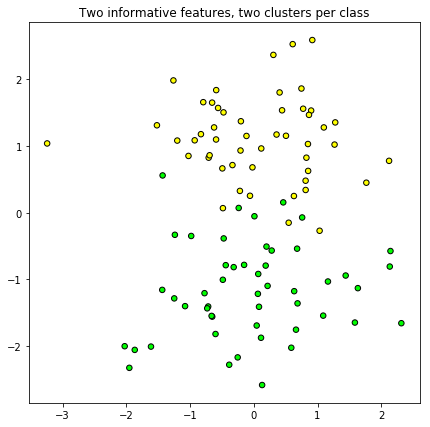

In [4]:
#Task3
plt.figure(figsize=(7, 7))
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_samples=100,n_features=3, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, random_state=42)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=30, edgecolor='k', cmap=cmap_bold)

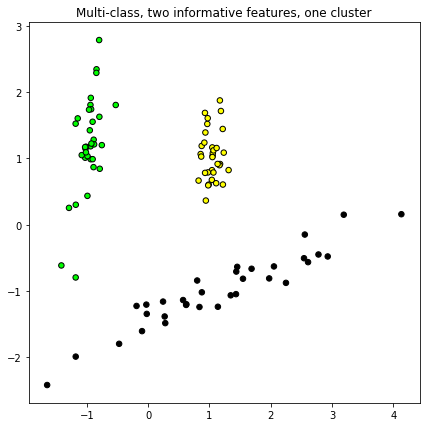

In [5]:
#Task4
plt.figure(figsize=(7, 7))
plt.title("Multi-class, two informative features, one cluster")
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, 
                             random_state=100)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k', cmap=cmap_bold)

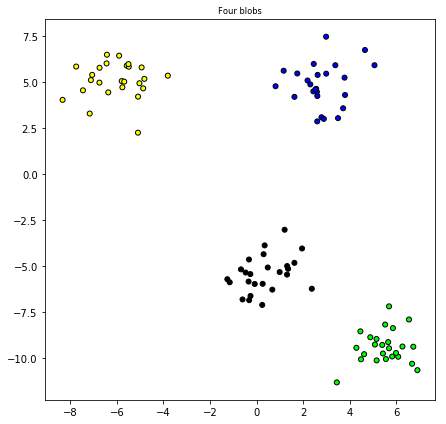

In [6]:
#Task5
plt.figure(figsize=(7, 7))
plt.title("Four blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=4, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', cmap=cmap_bold)

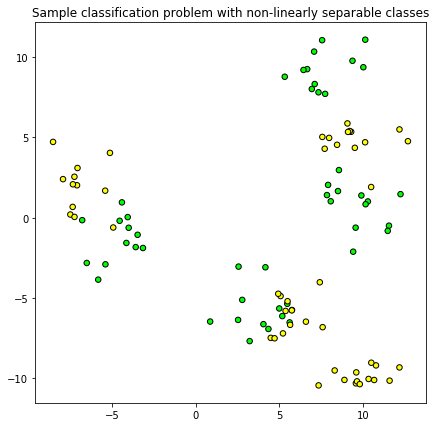

In [7]:
#Task6
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure(figsize=(7, 7))
plt.title('Sample classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, edgecolor='k', cmap=cmap_bold)
plt.show()